Label distribution in the dataset:
label
1    10
0     3
Name: count, dtype: int64

Training set label distribution:
label
1    8
0    2
Name: count, dtype: int64

Test set label distribution:
label
1    2
0    1
Name: count, dtype: int64

Naïve Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Naïve Bayes Accuracy: 0.67
Naïve Bayes Confusion Matrix:
[[0 1]
 [0 2]]

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67 

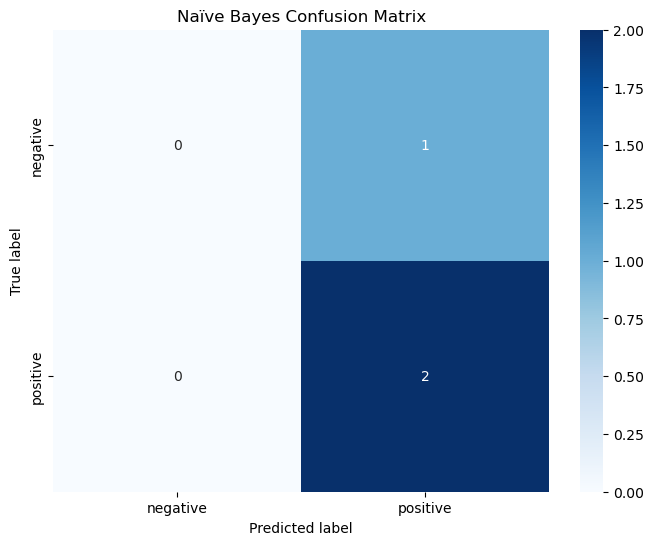

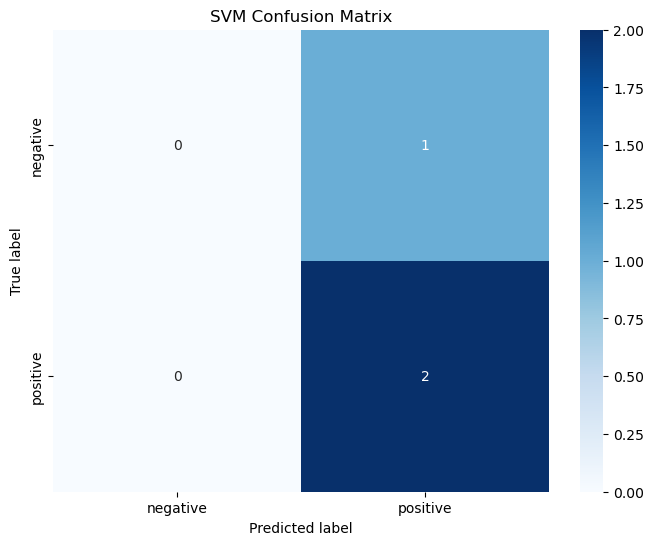

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Processed_Reviews.csv")

X = df['lemmatized'] 
y = df['label']  

print("Label distribution in the dataset:")
print(y.value_counts())

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set label distribution:")
print(y_train.value_counts())
print("\nTest set label distribution:")
print(y_test.value_counts())

nb_clf = MultinomialNB()  # Naïve Bayes classifier
svm_clf = SVC(kernel='linear')  # Support Vector Machine (SVM) classifier

# Train the Naïve Bayes classifier
nb_clf.fit(X_train, y_train)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Naïve Bayes evaluation
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted, zero_division=0)
nb_accuracy = accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted, labels=[0, 1]) 

# SVM evaluation
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted, zero_division=0)
svm_accuracy = accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted, labels=[0, 1])

# Display results for Naïve Bayes
print("\nNaïve Bayes Classifier Report:")
print(nb_report)
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")
print("Naïve Bayes Confusion Matrix:")
print(nb_cm)

# Display results for SVM
print("\nSVM Classifier Report:")
print(svm_report)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Confusion Matrix:")
print(svm_cm)


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naïve Bayes Confusion Matrix')
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')